In [1]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import folium

In [2]:
conn = sql.connect('../raw_data/FPA_FOD_20170508.sqlite')
db = conn.cursor()
db.execute("""
    SELECT *
    FROM sqlite_master
    WHERE type='table'
    """)
rows = db.fetchall()
pd.DataFrame(rows)

,0,1,2,3,4
0,table,spatial_ref_sys,spatial_ref_sys,2,CREATE TABLE spatial_ref_sys (\nsrid INTEGER N...
1,table,spatialite_history,spatialite_history,4,CREATE TABLE spatialite_history (\nevent_id IN...
2,table,sqlite_sequence,sqlite_sequence,5,"CREATE TABLE sqlite_sequence(name,seq)"
3,table,geometry_columns,geometry_columns,6,CREATE TABLE geometry_columns (\nf_table_name ...
4,table,spatial_ref_sys_aux,spatial_ref_sys_aux,20,CREATE TABLE spatial_ref_sys_aux (\n\tsrid INT...
5,table,views_geometry_columns,views_geometry_columns,5572,CREATE TABLE views_geometry_columns (\nview_na...
6,table,virts_geometry_columns,virts_geometry_columns,5586,CREATE TABLE virts_geometry_columns (\nvirt_na...
7,table,geometry_columns_statistics,geometry_columns_statistics,5597,CREATE TABLE geometry_columns_statistics (\nf_...
8,table,views_geometry_columns_statistics,views_geometry_columns_statistics,5603,CREATE TABLE views_geometry_columns_statistics...
9,table,virts_geometry_columns_statistics,virts_geometry_columns_statistics,5610,CREATE TABLE virts_geometry_columns_statistics...


In [3]:
[i[0] for i in db.description]

['type', 'name', 'tbl_name', 'rootpage', 'sql']

In [4]:
conn = sql.connect('../raw_data/FPA_FOD_20170508.sqlite')
db = conn.cursor()
db.execute("""
    SELECT *
    FROM fires
    WHERE FIRE_YEAR LIKE 2015
    ORDER BY STATE
    LIMIT 50
    """)
rows = db.fetchall()
print(rows)

[(1792350, 300203641, 'FS-6317264', 'FED', 'FS-FIRESTAT', 'FS', 'USAKCGF', 'Chugach National Forest', '1004', 'Chugach National Forest', '156', None, 'JQW3', 'MP 9.6 HOPE HWY', None, None, None, None, None, 2015, 2457162.5, 140, '1730', 4.0, 'Campfire', 2457162.5, 140, '1905', 0.1, 'A', 60.91027778, -149.45861111, 5.0, 'USFS', 'AK', '122', '122', 'Kenai Peninsula', b'\x00\x01\xad\x10\x00\x00\x07\xe14\xf1\xac\xaeb\xc0\x18\xb0w\xfb\x83tN@\x07\xe14\xf1\xac\xaeb\xc0\x18\xb0w\xfb\x83tN@|\x01\x00\x00\x00\x07\xe14\xf1\xac\xaeb\xc0\x18\xb0w\xfb\x83tN@\xfe'), (1792351, 300203642, 'FS-6317255', 'FED', 'FS-FIRESTAT', 'FS', 'USAKCGF', 'Chugach National Forest', '1004', 'Chugach National Forest', '235', '04', 'JRD6', 'SLAUGHTER RIDGE', None, None, None, None, None, 2015, 2457173.5, 151, '2215', 4.0, 'Campfire', 2457174.5, 152, '1601', 0.1, 'A', 60.50777778, -149.81111111, 5.0, 'USFS', 'AK', '122', '122', 'Kenai Peninsula', b'\x00\x01\xad\x10\x00\x00\xe8[I\x9f\xf4\xb9b\xc00^\xbf\xdc\xfe@N@\xe8[I\x9f

In [5]:
fires_df = pd.DataFrame(rows)

In [6]:
fires_df.columns = [i[0] for i in db.description]

In [7]:
fires_df

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1792350,300203641,FS-6317264,FED,FS-FIRESTAT,FS,USAKCGF,Chugach National Forest,1004,Chugach National Forest,...,A,60.910278,-149.458611,5.0,USFS,AK,122,122,Kenai Peninsula,b'\x00\x01\xad\x10\x00\x00\x07\xe14\xf1\xac\xa...
1,1792351,300203642,FS-6317255,FED,FS-FIRESTAT,FS,USAKCGF,Chugach National Forest,1004,Chugach National Forest,...,A,60.507778,-149.811111,5.0,USFS,AK,122,122,Kenai Peninsula,b'\x00\x01\xad\x10\x00\x00\xe8[I\x9f\xf4\xb9b\...
2,1792352,300203643,FS-6332819,FED,FS-FIRESTAT,FS,USAKCGF,Chugach National Forest,1004,Chugach National Forest,...,A,60.435000,-149.343333,7.0,STATE,AK,122,122,Kenai Peninsula,b'\x00\x01\xad\x10\x00\x00A\xff-\x96\xfc\xaab\...
3,1792353,300203644,FS-6330874,FED,FS-FIRESTAT,FS,USAKCGF,Chugach National Forest,1004,Chugach National Forest,...,A,60.399722,-149.643889,5.0,USFS,AK,122,122,Kenai Peninsula,b'\x00\x01\xad\x10\x00\x00\xd8\x99\xdf\xbc\x9a...
4,1792354,300203645,FS-6317259,FED,FS-FIRESTAT,FS,USAKCGF,Chugach National Forest,1004,Chugach National Forest,...,C,60.814444,-149.536389,5.0,USFS,AK,122,122,Kenai Peninsula,b'\x00\x01\xad\x10\x00\x00\x9b\x8f\x08\x19*\xb...
5,1792355,300203646,FS-6318199,FED,FS-FIRESTAT,FS,USAKTNF,Tongass National Forest,1005,Tongass National Forest,...,B,56.913889,-133.521389,5.0,USFS,AK,280,280,Wrangell-Petersburg,b'\x00\x01\xad\x10\x00\x00\x86\xe1\xc07\xaf\xb...
6,1792356,300203647,FS-6357769,FED,FS-FIRESTAT,FS,USAKTNF,Tongass National Forest,1005,Tongass National Forest,...,A,56.311111,-133.338611,5.0,USFS,AK,130,130,Ketchikan Gateway,"b""\x00\x01\xad\x10\x00\x00dp\xf7\xe6\xd5\xaa`\..."
7,1792357,300203648,FS-6356971,FED,FS-FIRESTAT,FS,USAKTNF,Tongass National Forest,1005,Tongass National Forest,...,A,55.424444,-131.612222,5.0,USFS,AK,130,130,Ketchikan Gateway,b'\x00\x01\xad\x10\x00\x00\x1a\x99\rS\x97s`\xc...
8,1792358,300203649,FS-6357771,FED,FS-FIRESTAT,FS,USAKTNF,Tongass National Forest,1005,Tongass National Forest,...,A,58.542500,-134.856389,5.0,USFS,AK,110,110,Juneau,b'\x00\x01\xad\x10\x00\x00\xa4f\xac\x89g\xdb`\...
9,1792359,300203650,FS-6319142,FED,FS-FIRESTAT,FS,USAKTNF,Tongass National Forest,1005,Tongass National Forest,...,A,55.690556,-132.580278,5.0,USFS,AK,201,201,Prince of Wales-Outer Ketchikan,b'\x00\x01\xad\x10\x00\x00@\xf6\xb4\xa2\x91\x9...


# Wildfire Counts

In [8]:
db.execute("""
    SELECT COUNT(*)
    FROM fires
    WHERE FIRE_YEAR LIKE 2015
    """)
count_2015 = db.fetchall()

In [9]:
count_2015

[(74491,)]

## Count by year

In [10]:
db.execute("""
    SELECT FIRE_YEAR,COUNT(*)
    FROM fires
    GROUP BY FIRE_YEAR
    """)
counts_by_year = db.fetchall()

<AxesSubplot:>

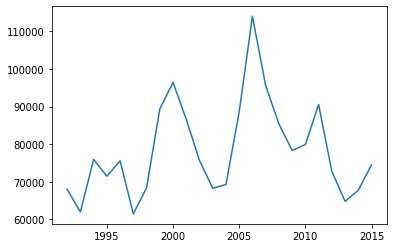

In [11]:
sns.lineplot(x=[i[0] for i in counts_by_year], y=[i[1] for i in counts_by_year])

In [ ]:
db.execute("""
    SELECT *
    FROM fires
    ORDER BY STATE
    """)
rows_all = db.fetchall()

In [ ]:
all_fires_df = pd.DataFrame(rows_all)

In [ ]:
all_fires_df.shape

In [ ]:
all_fires_df.columns = [i[0] for i in db.description]

In [ ]:
all_fires_df.head()

In [ ]:
all_fires_df.columns

In [ ]:
all_fires_df['FIRE_NAME']

### Check count by year of pandas dataframe for comparison with count by year of SQL

In [ ]:
all_fires_df.groupby('FIRE_YEAR').count()

## Count by State

In [ ]:
count_by_state = all_fires_df.groupby('STATE').count()

In [ ]:
count_by_state

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x = count_by_state.index, y = count_by_state['OBJECTID'])

In [ ]:
fig = go.Figure(data=go.Choropleth(
                locations=count_by_state.reset_index()["STATE"], 
                locationmode="USA-states", 
                z=count_by_state.reset_index()["OBJECTID"],
                colorscale="Reds",
                ))
fig.update_layout(
    geo_scope='usa', # limite map scope to USA
)
fig.show()

In [ ]:
coordinates_list = all_fires_df[['LATITUDE','LONGITUDE']].values.astype(str).tolist()

In [ ]:
wildfires_map = folium.Map(location=[38.9, -77.05], zoom_start=12)
for point in range(0, 10):
    folium.Marker(coordinates_list[point], popup=all_fires_df['FIRE_NAME'][point]).add_to(wildfires_map)
wildfires_map